<a href="https://colab.research.google.com/github/luai596/fscq/blob/master/last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier



**upload dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train_maskedv2.csv to Train_maskedv2.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "Test_maskedv2.csv" with length 567765 bytes


In [ ]:
import io

In [ ]:
#import pandas as pd
#train_data = pd.read_csv(io.StringIO(uploaded['Train_maskedv2.csv'].decode('utf-8')))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_maskedv2.csv to Test_maskedv2 (1).csv


In [ ]:
# Reading datasets
train_data = pd.read_csv('Train_maskedv2.csv')
test_data = pd.read_csv('Test_maskedv2.csv')
var_decription = pd.read_csv("variable_descriptions_v2.csv")
sample_submission = pd.read_csv("samplesubmissionv2.csv")

In [ ]:
sb.heatmap(train_data.isnull())

In [ ]:
train_data.info()

In [ ]:
#Dropping the ID features (ward) and redundant features
train_data = train_data.drop(['ward', 'dw_12', 'dw_13', 'lan_13'], axis=1)
test_data= test_data.drop(['ward', 'dw_12', 'dw_13', 'lan_13'], axis=1)

In [ ]:
#Quick feature engineering
train_data['a1'] = train_data['psa_01'] + train_data['stv_00']
test_data['a1'] = test_data['psa_01'] + test_data['stv_00']

train_data['a2'] = train_data['psa_00'] + train_data['stv_01']
test_data['a2'] = test_data['psa_00'] + test_data['stv_01']

train_data['a3'] = train_data['lln_00'] + train_data['psa_01']
test_data['a3'] = test_data['lln_00'] + test_data['psa_01']

In [ ]:
# print shape
print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

train data shape: (3174, 53)
test data shape: (1102, 52)


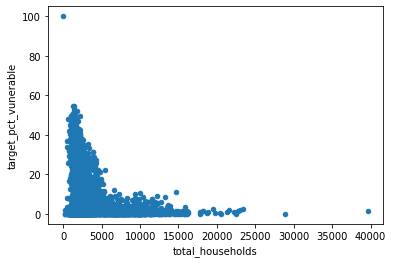

In [ ]:
train_data.plot(kind='scatter',x='total_households',y='target_pct_vunerable')

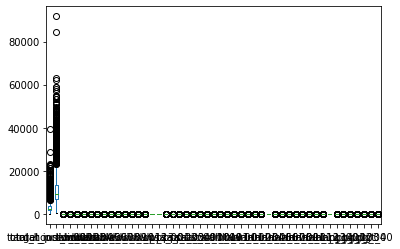

In [ ]:
train_data.plot(kind='box')

In [ ]:
#correlation cofficient
train_data.corr()

In [ ]:
x=train_data.values
y = train_data[['target_pct_vunerable']]
#total_households=train_data.DataFrame(data['total_households'])
#=train_data.DataFrame(data['target_pct_vunerable'])

In [ ]:
train_data.info()

In [ ]:
test_data.to_csv("Test_maskedv2.csv",index=False)

In [ ]:
#modeling the dataset
from sklearn.metrics import mean_squared_error

In [ ]:
x = train_data[['total_households', 'total_individuals',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00']]
y = train_data[['target_pct_vunerable']]

In [ ]:
#splitting the training data
from sklearn.model_selection import train_test_split


In [ ]:
#perform 20/80 data split
X_train, X_test,y_train, y_test = train_test_split(x, y,train_size=0.2,random_state=0)

In [ ]:
#import libraries to build the model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
#Define the liner regression model
lm=linear_model.LinearRegression()

In [ ]:
#Build the training model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#applay trained model to make prediction (on test set)
y_pred=lm.predict(X_test)

In [ ]:
#print model performance
print('coefficients:',lm.coef_)
print('Intercept:',lm.intercept_)
print('Mean square error(MSE):%2f')
%mean_squared_error(y_test,y_pred))
print('coefficients of determination(R^2):'
%r2_score(y_test,y_pred))

coefficients: [[-1.13384563e-03  3.11420456e-04  1.37328620e+08  1.37328638e+08
   1.37328630e+08  1.37328642e+08  1.37328622e+08  1.37328606e+08
   1.37328621e+08  1.37328610e+08  1.37328615e+08  1.37328599e+08
   1.37328513e+08  1.37328639e+08  7.52810852e+00  2.28435902e+00
  -1.02224227e+08 -1.02224254e+08 -1.02224741e+08 -1.02224241e+08
  -1.02224078e+08  9.28135958e+00  3.79698138e+00 -1.17808635e+02
  -9.67851530e+01  4.50087308e+00  3.18892421e+00  3.25853802e+07
   3.25853862e+07  3.25853820e+07  3.25853850e+07  3.25853853e+07
   3.25853917e+07  3.25853802e+07  3.25853899e+07  3.25854268e+07
   3.25853886e+07  3.25853959e+07  3.25853871e+07  3.25853482e+07
   0.00000000e+00  3.25852319e+07 -4.10448462e+07 -4.10448415e+07
  -4.10448312e+07 -4.10448217e+07 -4.10448640e+07 -1.08194583e+01]]
Intercept: [-26644825.09347872]
Mean square error(MSE):%2f


UsageError: Line magic function `%mean_squared_error` not found.


**string formatting**

In [ ]:
#by default r2_score return floating point value
r2_score(y_test,y_pred)

0.7047830362793654

In [ ]:
r2_score(y_test,y_pred).dtype

dtype('float64')

**Building SVR **

In [ ]:
#importing libraries
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
#fitting and prediction
svr=SVR().fit(X_train,y_train)
print(svr)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
yfit=svr.predict(X_train)

In [ ]:

plt.scatter(X_train,y_train,s=5,color='blue',label='original')
plt.plot(X_train,yfit,lw=2,color='red',label='fitted')
plt.legend()
plt.show()

In [ ]:
score=svr.score(X_train,y_train)
print('R-square :',score)
print('MSE',mean_squared_error(y_test,y_pred))

R-square : -0.11029785120496682
MSE 49.47486016624644


In [ ]:
#build the model
len(train_data)

3174

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#prediction
x_test = test_data[['total_households', 'total_individuals',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00']]
predictions = clf.predict(x_test)

In [ ]:
print('The first 15th predicted values:{}\n'.format(predictions[:15]))

The first 15th predicted values:[17.03089699 22.38793321  7.08322718  3.67022478 -2.90264126 19.2102737
 23.73758531 21.01318784  1.3330822   8.57041298  5.09485333  3.99761587
  4.05703345  6.7233957   2.86065027]



**check for null values**

In [ ]:
#false :NOT NULL, YES:NULL 
train_data.isnull()

In [ ]:
#ther is no null value 
train_data.isnull().head()

In [ ]:
#summation of null >>>> zero no null
train_data.isnull().sum()

In [ ]:
import io

In [ ]:
test_data = pd.read_csv(io.StringIO(uploaded['Test_maskedv2.csv'].decode('utf-8')))

**Data info (check for missing values) 

In [ ]:
df_info= pd.DataFrame({"Dtype": train_data.dtypes, "Unique": train_data.nunique(), "Missing%": (train_data.isnull().sum()/train_data.shape[0])*100})
df_info

In [ ]:
#check for missing and null summation values
print('missing values:\n',train_data.isnull().sum())

In [ ]:
 #seprate dataframe into x and y
#x=train_data.values
#y=train_data[''].values

In [ ]:
#inspect train data
train_data.head()

In [ ]:
#understand the meaning of each variable in the dataset
submission=pd.read_csv('samplesubmissionv2.csv')
submission.head()

**Exploratory Data**

In [ ]:
#show list of columns
list(train_data.columns)

In [ ]:
# show some information about the dataset
print(train_data.info())

In [ ]:
# show Data columns
train_data.columns

In [ ]:
#inspect to test data
test_data.head()

In [ ]:
#build the model
len(train_data)

3174

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

In [ ]:
#prediction
x_test = test_data[['total_households', 'total_individuals',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00']]
predictions = clf.predict(x_test)

In [ ]:
print('The first 15th predicted values:{}\n'.format(predictions[:15]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr=SVR().fit(X,ytest)
print(svr)


NameError: ignored

In [ ]:
#CREATE FINAL CSV FILE
final_data = pd.DataFrame(data=predictions,columns=["target_pct_vunerable"])

In [ ]:
final = pd.concat([test_data['ward'],final_data],axis=1,join='inner')


In [ ]:
final.head()

In [ ]:
final.to_csv('final.csv', index=False)

In [ ]:
test_data.head()

In [ ]:
predictions = clf.predict(x_test)
print(predictions)

[17.03089699 22.38793321  7.08322718 ...  7.19829785  5.51223024
  4.83793509]


In [ ]:
final_data = pd.DataFrame(data=predictions,columns=["target_pct_vunerable"])

In [ ]:
final = pd.concat([test_data['ward'],final_data],axis=1,join='inner')

In [ ]:
final.head()

In [ ]:
final.to_csv('final.csv', index=False)

In [ ]:
print(test_data)
print(predictions)